# Exploratory data analysis

In [240]:
import os
import sys
import numpy as np
import pandas as pd
import pydicom as dcm
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.filters import threshold_otsu
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/Users/liponan/anaconda3/envs/bmi260/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


## Index images

In [68]:
# 2017
DATAPATH = "/Users/liponan/Data/TCIA"


In [241]:
read_cache = True
quick_scan = False

if read_cache:
    df_dcm = pd.read_csv("df_dcm.csv", index_col=0)
else:
    data = list()
    results = glob.glob(os.path.join(DATAPATH, "**/*.dcm"), recursive=True)
    if quick_scan:
        for filename in results:
            data.append(dict(filename=filename))
        df_dcm = pd.DataFrame(data)
    else:
        for filename in results:
            meta = dcm.read_file(filename)
            data.append(dict(filename=filename, PatientID=meta.PatientID, AcquisitionNumber=meta.AcquisitionNumber,
                             InstanceNumber=meta.InstanceNumber, SeriesNumber=meta.SeriesNumber,
                             SeriesInstanceUID=meta.SeriesInstanceUID,
                             StudyInstanceUID=meta.StudyInstanceUID))
        df_dcm = pd.DataFrame(data).sort_values(by=["PatientID", "AcquisitionNumber", "InstanceNumber"])
df_dcm

,filename,PatientID,AcquisitionNumber,InstanceNumber,SeriesNumber,SeriesInstanceUID,StudyInstanceUID
109158,/Users/liponan/Data/TCIA/NSCLC Radiogenomics/AMC-001/1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443/1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907/1-001.dcm,AMC-001,1.0,1,3.0,1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907,1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443
109174,/Users/liponan/Data/TCIA/NSCLC Radiogenomics/AMC-001/1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443/1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907/1-002.dcm,AMC-001,1.0,2,3.0,1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907,1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443
109187,/Users/liponan/Data/TCIA/NSCLC Radiogenomics/AMC-001/1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443/1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907/1-003.dcm,AMC-001,1.0,3,3.0,1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907,1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443
109143,/Users/liponan/Data/TCIA/NSCLC Radiogenomics/AMC-001/1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443/1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907/1-004.dcm,AMC-001,1.0,4,3.0,1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907,1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443
109156,/Users/liponan/Data/TCIA/NSCLC Radiogenomics/AMC-001/1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443/1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907/1-005.dcm,AMC-001,1.0,5,3.0,1.3.6.1.4.1.14519.5.2.1.4334.1501.128241934543986080196677451907,1.3.6.1.4.1.14519.5.2.1.4334.1501.772823147212833057678103865443
...,...,...,...,...,...,...,...
173326,/Users/liponan/Data/TCIA/TCGA-BLCA/TCGA-ZF-AA5N/1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699/1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845/1-390.dcm,TCGA-ZF-AA5N,1.0,390,2.0,1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845,1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699
173339,/Users/liponan/Data/TCIA/TCGA-BLCA/TCGA-ZF-AA5N/1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699/1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845/1-391.dcm,TCGA-ZF-AA5N,1.0,391,2.0,1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845,1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699
173309,/Users/liponan/Data/TCIA/TCGA-BLCA/TCGA-ZF-AA5N/1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699/1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845/1-392.dcm,TCGA-ZF-AA5N,1.0,392,2.0,1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845,1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699
173300,/Users/liponan/Data/TCIA/TCGA-BLCA/TCGA-ZF-AA5N/1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699/1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845/1-393.dcm,TCGA-ZF-AA5N,1.0,393,2.0,1.3.6.1.4.1.14519.5.2.1.1501.4016.189707440874271316205823796845,1.3.6.1.4.1.14519.5.2.1.1501.4016.156184183786062923172520352699


In [242]:
# df_dcm.to_csv("df_dcm.csv")

In [243]:
meta = dcm.read_file(results[1])
for key in meta.__dir__():
    val = getattr(meta, key)
    if isinstance(val, int):
        print(key, val)
    if isinstance(val, str):
        print(key, val)
    if isinstance(val, float):
        print(key, val)



AccessionNumber 1660909751541109
AcquisitionDate 19980426
AcquisitionNumber 1
AcquisitionTime 095647
BitsAllocated 16
BitsStored 16
BodyPartExamined LUNG
Columns 512
ContentDate 19980426
ContentTime 095658
ContrastBolusAgent &
ContrastBolusRoute Oral & IV
ConvolutionKernel STANDARD
DataCollectionDiameter 500.000000
DeidentificationMethod Per DICOM PS 3.15 AnnexE. Details in 0012,0064
DerivationDescription 3:1 JPEGLOSSLESSPROCFIRSTORDERREDICT
DistanceSourceToDetector 949.075012
DistanceSourceToPatient 541.000000
Exposure 4689
ExposureTime 981
FilterType BODY FILTER
FocalSpots 1.200000
FrameOfReferenceUID 1.3.6.1.4.1.14519.5.2.1.3023.4012.140051195749117145206674332704
GantryDetectorTilt 0.000000
GeneratorPower 48000
HighBit 15
InstanceCreationDate 19980426
InstanceCreationTime 095658
InstanceNumber 7
KVP 120
LongitudinalTemporalInformationModified MODIFIED
LossyImageCompression 00
Manufacturer GE MEDICAL SYSTEMS
ManufacturerModelName LightSpeed Plus
Modality CT
PatientAge 076Y
PatientBi

In [244]:
df_dcm["InstanceNumber"].describe()

count    190274.000000
mean     133.196906   
std      120.619313   
min      1.000000     
25%      43.000000    
50%      96.000000    
75%      189.000000   
max      888.000000   
Name: InstanceNumber, dtype: float64

## Annotations

In [245]:
csv_path = "data/CrowdsCureCancer2017Annotations.csv"
# csv_path = "data/CrowdsCureCancer2018-Results.csv"

df_csv = pd.read_csv(csv_path)#.sort_values(by=["patientID", "sliceIndex"])
df_csv = pd.read_csv(csv_path).sort_values(by=["patientID", "sliceIndex"])
df_csv["sliceIndexOneBased"] = df_csv["sliceIndex"] + 1
# df_csv.dropna(how='all')
# df_csv.dropna(axis=1, how="any")
df_csv

,order,anatomy,seriesUID,patientID,instanceUID,length,start_x,start_y,end_x,end_y,...,radiologist_status,_id,sliceIndex,date_unix,date,StudyInstanceUID,StudyDate,StudyTime,SOPClassUID,sliceIndexOneBased
655,657,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.289785275932338680285245281583,70.502686,325.586740,227.067403,275.801105,307.969061,...,not_radiologist,5b6eb4301d3175942d29985a3d47a7b1,7,1511997552,43068,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,94023.0,1.2.840.10008.5.1.4.1.1.2,8
1673,1675,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.107284649442662652345889973502,145.982724,263.354696,296.654144,239.027624,101.471823,...,radiologist,5b6eb4301d3175942d29985a3d2e3d64,11,1511883089,43067,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,94023.0,1.2.840.10008.5.1.4.1.1.2,12
1743,1745,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.107284649442662652345889973502,147.206457,243.553591,101.471823,271.840884,297.785635,...,radiologist,5b6eb4301d3175942d29985a3d19c0c0,11,1511799791,43066,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,94023.0,1.2.840.10008.5.1.4.1.1.2,12
2134,2136,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.107284649442662652345889973502,149.123177,266.229770,300.427572,242.189810,100.947053,...,radiologist,5b6eb4301d3175942d29985a3d09a97d,11,1511724373,43065,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,94023.0,1.2.840.10008.5.1.4.1.1.2,12
652,654,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.115512319570807352125051359179,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.331242075569546464385522373435,71.560062,324.455249,220.278453,283.155801,307.403315,...,not_radiologist,5b6eb4301d3175942d29985a3d474d51,42,1511997415,43068,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,94023.0,1.2.840.10008.5.1.4.1.1.2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1709,Ovarian,1.3.6.1.4.1.14519.5.2.1.8421.4007.216624322416919889992460111826,TCGA-OY-A56P,1.3.6.1.4.1.14519.5.2.1.8421.4007.190197598480880533373285651578,80.793263,215.476408,187.119631,238.076104,275.180514,...,radiologist,5b6eb4301d3175942d29985a3d4b79af,97,1512056784,43069,1.3.6.1.4.1.14519.5.2.1.8421.4007.129794073413471517081069171708,20050712,131300.0,1.2.840.10008.5.1.4.1.1.2,98
1814,1816,Ovarian,1.3.6.1.4.1.14519.5.2.1.8421.4007.951093057096604389592561755236,TCGA-OY-A56Q,1.3.6.1.4.1.14519.5.2.1.8421.4007.340267477361471192133764279406,29.832510,199.425414,260.446409,172.269613,281.944751,...,not_radiologist,5b6eb4301d3175942d29985a3d4dbee1,67,1512060118,43069,1.3.6.1.4.1.14519.5.2.1.8421.4007.120026640519680257943784523182,20070607,83341.0,1.2.840.10008.5.1.4.1.1.2,68
148,149,Ovarian,1.3.6.1.4.1.14519.5.2.1.8421.4007.951093057096604389592561755236,TCGA-OY-A56Q,1.3.6.1.4.1.14519.5.2.1.8421.4007.178252826947905526191312947487,73.494242,220.195804,363.340659,289.246753,313.214785,...,radiologist,5b6eb4301d3175942d29985a3d0e5408,100,1511728300,43065,1.3.6.1.4.1.14519.5.2.1.8421.4007.120026640519680257943784523182,20070607,83341.0,1.2.840.10008.5.1.4.1.1.2,101
1962,1964,Ovarian,1.3.6.1.4.1.14519.5.2.1.8421.4007.951093057096604389592561755236,TCGA-OY-A56Q,1.3.6.1.4.1.14519.5.2.1.8421.4007.178252826947905526191312947487,72.606630,218.095028,354.360221,297.299447,325.507182,...,radiologist,5b6eb4301d3175942d29985a3d30a375,100,1511890259,43067,1.3.6.1.4.1.14519.5.2.1.8421.4007.120026640519680257943784523182,20070607,83341.0,1.2.840.10008.5.1.4.1.1.2,101


In [249]:
df_csv["sliceIndexOneBased"].describe()

count    2345.000000
mean     50.957783  
std      38.971443  
min      1.000000   
25%      24.000000  
50%      41.000000  
75%      68.000000  
max      409.000000 
Name: sliceIndexOneBased, dtype: float64

In [258]:
# 2017
df = df_csv.merge(df_dcm, left_on=["patientID", "seriesUID", "sliceIndexOneBased"],
                  right_on=["PatientID", "SeriesInstanceUID", "InstanceNumber"]).dropna(axis=1, how="any")
# 2018
# df = df_csv.merge(df_dcm, left_on=["SeriesInstanceUID"], right_on=["SeriesInstanceUID"]).dropna(axis=1, how="any")
df

,order,anatomy,seriesUID,patientID,instanceUID,length,start_x,start_y,end_x,end_y,...,date,StudyInstanceUID_x,StudyDate,SOPClassUID,sliceIndexOneBased,filename,PatientID,InstanceNumber,SeriesInstanceUID,StudyInstanceUID_y
0,657,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.289785275932338680285245281583,70.502686,325.586740,227.067403,275.801105,307.969061,...,43068,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,1.2.840.10008.5.1.4.1.1.2,8,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0364/03-31-1989-CT ABD PELV EN-98354/3.000000-DELAYED-26868/08-01.dcm,TCGA-09-0364,8,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354
1,1675,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.107284649442662652345889973502,145.982724,263.354696,296.654144,239.027624,101.471823,...,43067,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,1.2.840.10008.5.1.4.1.1.2,12,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0364/03-31-1989-CT ABD PELV EN-98354/3.000000-DELAYED-26868/12-01.dcm,TCGA-09-0364,12,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354
2,1745,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.107284649442662652345889973502,147.206457,243.553591,101.471823,271.840884,297.785635,...,43066,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,1.2.840.10008.5.1.4.1.1.2,12,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0364/03-31-1989-CT ABD PELV EN-98354/3.000000-DELAYED-26868/12-01.dcm,TCGA-09-0364,12,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354
3,2136,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.107284649442662652345889973502,149.123177,266.229770,300.427572,242.189810,100.947053,...,43065,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,1.2.840.10008.5.1.4.1.1.2,12,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0364/03-31-1989-CT ABD PELV EN-98354/3.000000-DELAYED-26868/12-01.dcm,TCGA-09-0364,12,1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354
4,654,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.115512319570807352125051359179,TCGA-09-0364,1.3.6.1.4.1.14519.5.2.1.7695.4007.331242075569546464385522373435,71.560062,324.455249,220.278453,283.155801,307.403315,...,43068,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354,19890331,1.2.840.10008.5.1.4.1.1.2,43,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0364/03-31-1989-CT ABD PELV EN-98354/2.000000-AXIAL-59179/04-02.dcm,TCGA-09-0364,43,1.3.6.1.4.1.14519.5.2.1.7695.4007.115512319570807352125051359179,1.3.6.1.4.1.14519.5.2.1.7695.4007.250730721548000739633557298354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,1709,Ovarian,1.3.6.1.4.1.14519.5.2.1.8421.4007.216624322416919889992460111826,TCGA-OY-A56P,1.3.6.1.4.1.14519.5.2.1.8421.4007.190197598480880533373285651578,80.793263,215.476408,187.119631,238.076104,275.180514,...,43069,1.3.6.1.4.1.14519.5.2.1.8421.4007.129794073413471517081069171708,20050712,1.2.840.10008.5.1.4.1.1.2,98,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-OY-A56P/07-12-2005-Outside Read or Comparison BODY CT-71708/3.000000-ABDOMEN PELVIS-11826/1-098.dcm,TCGA-OY-A56P,98,1.3.6.1.4.1.14519.5.2.1.8421.4007.216624322416919889992460111826,1.3.6.1.4.1.14519.5.2.1.8421.4007.129794073413471517081069171708
2298,1816,Ovarian,1.3.6.1.4.1.14519.5.2.1.8421.4007.951093057096604389592561755236,TCGA-OY-A56Q,1.3.6.1.4.1.14519.5.2.1.8421.4007.340267477361471192133764279406,29.832510,

In [262]:
df.to_csv("combined_df.csv")

In [259]:
df.iloc[0]

order                 657                                                                                                           
anatomy               Ovarian                                                                                                       
seriesUID             1.3.6.1.4.1.14519.5.2.1.7695.4007.290560597213035590678005726868                                              
patientID             TCGA-09-0364                                                                                                  
instanceUID           1.3.6.1.4.1.14519.5.2.1.7695.4007.289785275932338680285245281583                                              
length                70.5027                                                                                                       
start_x               325.587                                                                                                       
start_y               227.067                                        

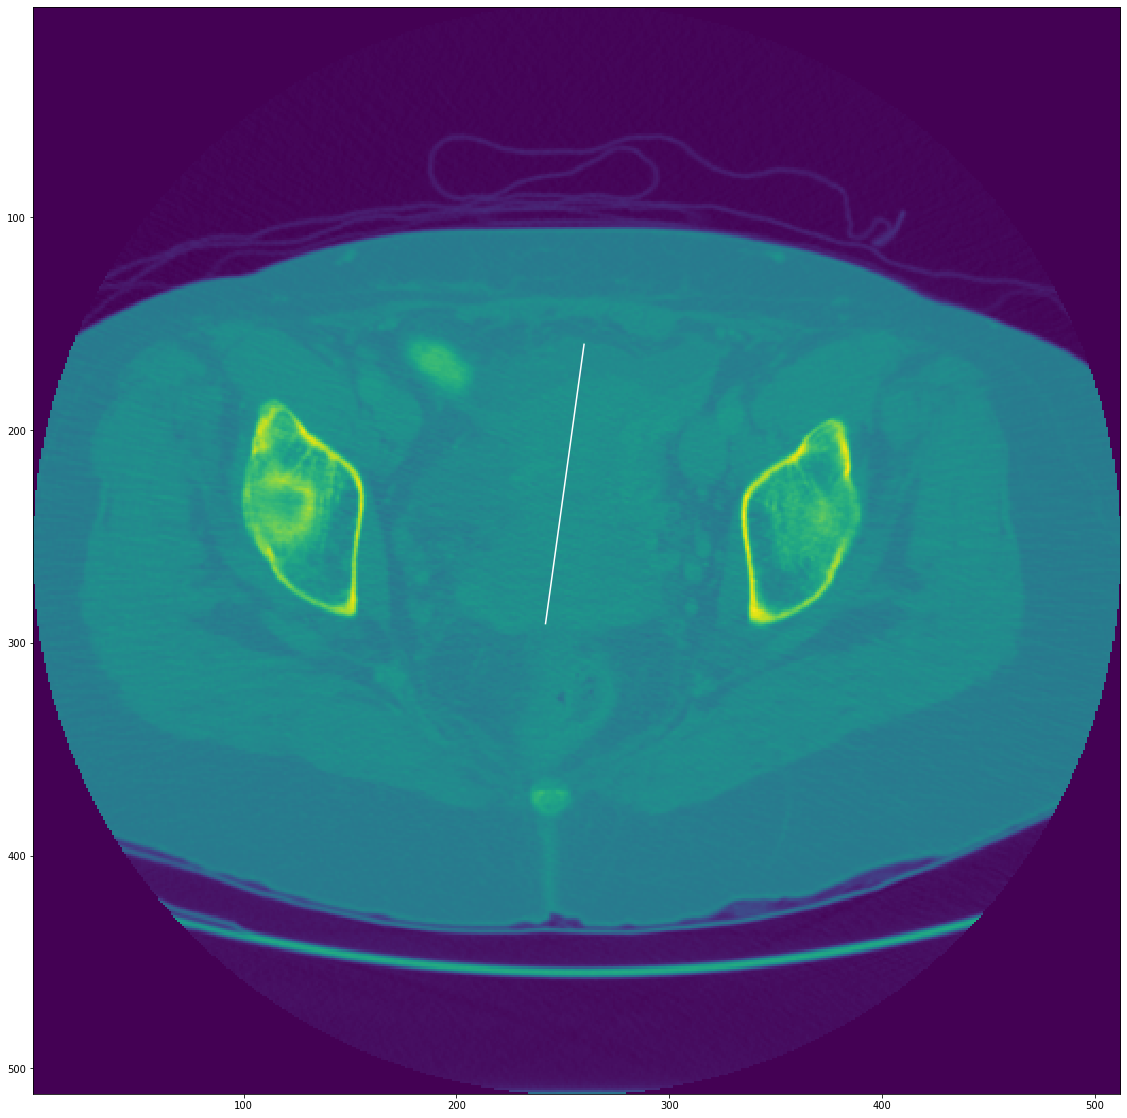

In [261]:
i = 200

x0, x1, y0, y1 = df.iloc[i][["start_x", "end_x", "start_y", "end_y"]]
# x0, y0, x1, y1 = df.iloc[i][["LongAxis.point1.x", "LongAxis.point1.y", "LongAxis.point2.x", "LongAxis.point2.y"]]
# x2, y2, x3, y3 = df.iloc[i][["ShortAxis.point1.x", "ShortAxis.point1.y", "ShortAxis.point2.x", "ShortAxis.point2.y"]]

fig = plt.figure()
fig.set_size_inches(20, 20)
plt.imshow(dcm.read_file(df["filename"].iloc[i]).pixel_array, extent=(1, 512, 512, 1), vmin=0)
plt.plot([x0, x1], [y0, y1], "w")



In [123]:


meta = dcm.read_file("/Users/liponan/Downloads/CrowdsCureCancer2018-DICOM-SR/zesty.rabbit-Anti-PD-1_Lung-PD-1-Lung-00040-1.3.6.1.4.1.14519.5.2.1.3098.5025.701414859994763933890427806221.dcm")
meta

(0008, 0016) SOP Class UID                       UI: Enhanced SR Storage
(0008, 0018) SOP Instance UID                    UI: 2.25.349164568476616475310297835177716162626
(0008, 0020) Study Date                          DA: '20080815'
(0008, 0021) Series Date                         DA: '20190530'
(0008, 0023) Content Date                        DA: '20190530'
(0008, 0030) Study Time                          TM: '000000'
(0008, 0031) Series Time                         TM: '085221'
(0008, 0033) Content Time                        TM: '085221'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'SR'
(0008, 0070) Manufacturer                        LO: 'Unspecified'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 0110)  Coding Scheme Identification Sequence   2 item(s) ---- 
   (0008, 0102) Coding Scheme Designator            SH: '99dcmjs'
   (0008, 0103) Coding Scheme Version               SH: '0'
   (0008, 0115) Co